In [1]:
import numpy as np
from scipy.signal import periodogram
from scipy.stats import norm
import matplotlib.pyplot as plt

In [5]:
# message to be transmitted
# msg = np.array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0])
msg = "100001111010001101111110001111010111100001"
# print(msg)
Eb = 0.001
fc = 100
fs = 10000
Tb = 0.001

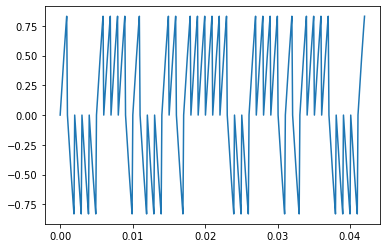

In [7]:
signal = []
t = np.linspace(0, Tb, int(Tb*fs))
for i in msg:
    s = np.sqrt(2*Eb/Tb)*np.sin(2*np.pi*fc*t)
    if i == "0":
        s = -s
    signal.extend(s)
t = np.linspace(0, len(msg)*Tb,int(len(msg)*Tb*fs))

fig, ax = plt.subplots()
ax.plot(t, signal)

Text(0, 0.5, 'Power Spectral Density')

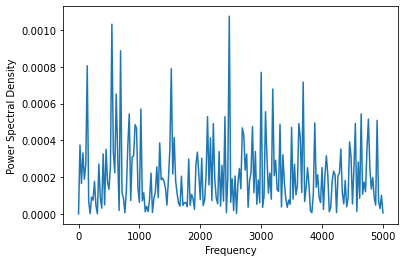

In [9]:
# Noise
ns = len(signal)
noise = np.random.normal(size=ns)

f, psd = periodogram(noise, fs)

# fig, ax = plt.subplots(2,1)
# ax[0].plot(noise)
# ax[1].plot(f, psd)

# psd_av = np.mean(psd)
# N0 = 2*psd_av
# signal += noise
# print(N0)

plt.plot(f, psd)
plt.xlabel('Frequency')
plt.ylabel('Power Spectral Density')


In [16]:
# PSK Coherent Binary Receiver
t = np.linspace(0, Tb, int(Tb*fs))
phi = np.sqrt(2/Tb)*np.sin(2*np.pi*fc*t)
N = len(signal) // len(t)
# print(N)
signala = np.array_split(signal, N)
# print(len(signal))
received_msg = []
for i in signala:
    x = i*phi
    sm = x.sum()/fs
    if sm > 0:
        received_msg.append("1")
    else:
        received_msg.append("0")

In [17]:
recv_msg=''.join(received_msg)
recv_msg

'100001111010001101111110001111010111100001'

In [28]:
def BinaryToDecimal(binary):

	binary1 = binary
	decimal, i, n = 0, 0, 0
	while(binary != 0):
		dec = binary % 10
		decimal = decimal + dec * pow(2, i)
		binary = binary//10
		i += 1
	return (decimal)

# Driver's code
# initializing binary data
#bin_data ='100001111010001101111110001111010111100001'
bin_data='100001111010001101111110001111010111100001'

# print binary data
print("The binary value is:", bin_data)

# initializing a empty string for
# storing the string data
str_data =''

# slicing the input and converting it
# in decimal and then converting it in string
for i in range(0, len(bin_data), 7):
    temp_data = int(bin_data[i:i + 7])
    decimal_data = BinaryToDecimal(temp_data)
    str_data = str_data + chr(decimal_data)

# printing the result
print("The Binary value after string conversion is:",str_data)

The binary value is: 100001111010001101111110001111010111100001
The Binary value after string conversion is: Chocka
